# Q1: Identify missing or incorrect data and apply appropriate preprocessing steps

In [3]:
import pandas as pd

dataset = pd.read_csv('Downloads/randomwalk-ds-assessment-level2-main/randomwalk-ds-assessment-level2-main/dataset.csv')

print("Missing Data Summary (Before Cleaning):\n", dataset.isnull().sum())

numeric_cols = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
for col in numeric_cols:
    dataset[col] = dataset.groupby('species')[col].transform(lambda x: x.fillna(x.median()))

dataset['sex'].fillna('Unknown', inplace=True)

print("Missing Data Summary (After Cleaning):\n", dataset.isnull().sum())

print("Cleaned Dataset:\n", dataset.head())

Missing Data Summary (Before Cleaning):
 species               0
island                0
bill_length_mm        7
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  16
dtype: int64
Missing Data Summary (After Cleaning):
 species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64
Cleaned Dataset:
   species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen            38.8           18.4              190.0   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g      sex  
0       3750.0     male  
1       3800.0   female  
2       3250.0   female

C:\Users\91894\AppData\Local\Temp\ipykernel_11464\2836567698.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['sex'].fillna('Unknown', inplace=True)


# Q2: What is the average body_mass_g for Gentoo penguins?

In [5]:
gentoo_avg_body_mass = dataset[dataset['species'] == 'Gentoo']['body_mass_g'].mean()
print("Average body_mass_g for Gentoo penguins:", gentoo_avg_body_mass)

Average body_mass_g for Gentoo penguins: 5133.064516129032


# Q3: Compare bill_length_mm and bill_depth_mm distributions for each species

In [7]:
from scipy.stats import skew, kurtosis

features = ['bill_length_mm', 'bill_depth_mm']
for feature in features:
    print(f"\nFeature: {feature}")
    for species in dataset['species'].unique():
        species_data = dataset[dataset['species'] == species][feature]
        print(f"  {species} - Skewness: {skew(species_data):.2f}, Kurtosis: {kurtosis(species_data):.2f}")



Feature: bill_length_mm
  Adelie - Skewness: 0.16, Kurtosis: -0.17
  Gentoo - Skewness: 0.70, Kurtosis: 1.41
  Chinstrap - Skewness: -0.13, Kurtosis: 0.00

Feature: bill_depth_mm
  Adelie - Skewness: 0.32, Kurtosis: -0.08
  Gentoo - Skewness: 0.32, Kurtosis: -0.59
  Chinstrap - Skewness: 0.01, Kurtosis: -0.90


# Q4: Identify and visualize outliers

Outliers in bill_length_mm: 0


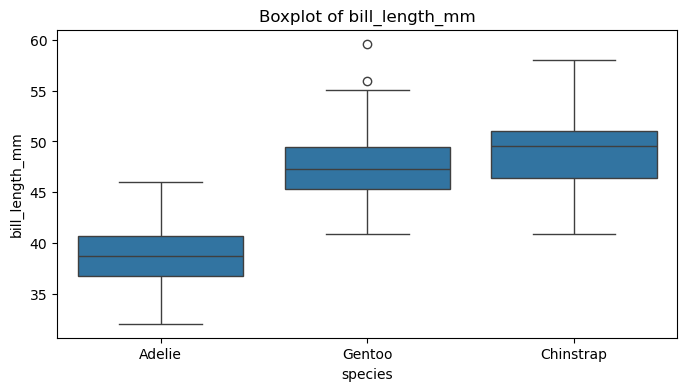

Outliers in bill_depth_mm: 0


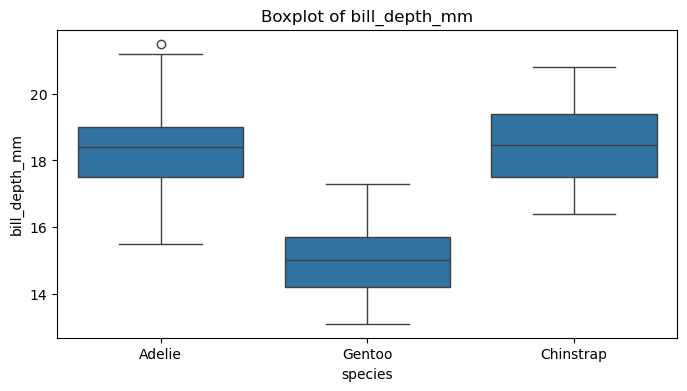

Outliers in flipper_length_mm: 0


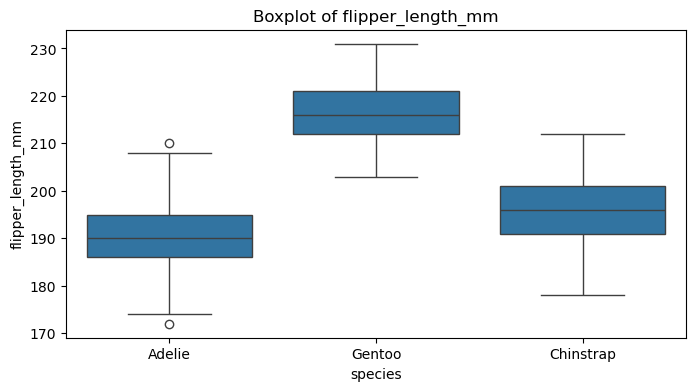

Outliers in body_mass_g: 3


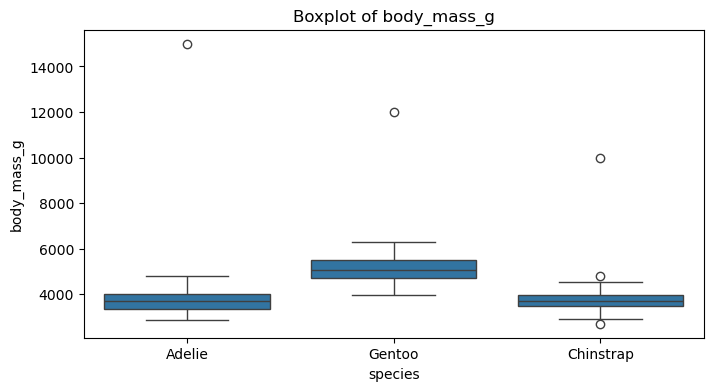

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

def detect_outliers(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[col] < lower_bound) | (data[col] > upper_bound)]

for col in numeric_cols:
    outliers = detect_outliers(dataset, col)
    print(f"Outliers in {col}: {len(outliers)}")

    # Plot
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='species', y=col, data=dataset)
    plt.title(f"Boxplot of {col}")
    plt.show()


# Q5: Does the dataset contribute to the curse of dimensionality? Perform PCA.

In [11]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

numeric_data = dataset[numeric_cols]
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)

pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)
print("Explained Variance Ratio:", pca.explained_variance_ratio_)


Explained Variance Ratio: [0.61912526 0.19564998]


# Q6: Plot 7 different graphs for bill_length_mm vs bill_depth_mm

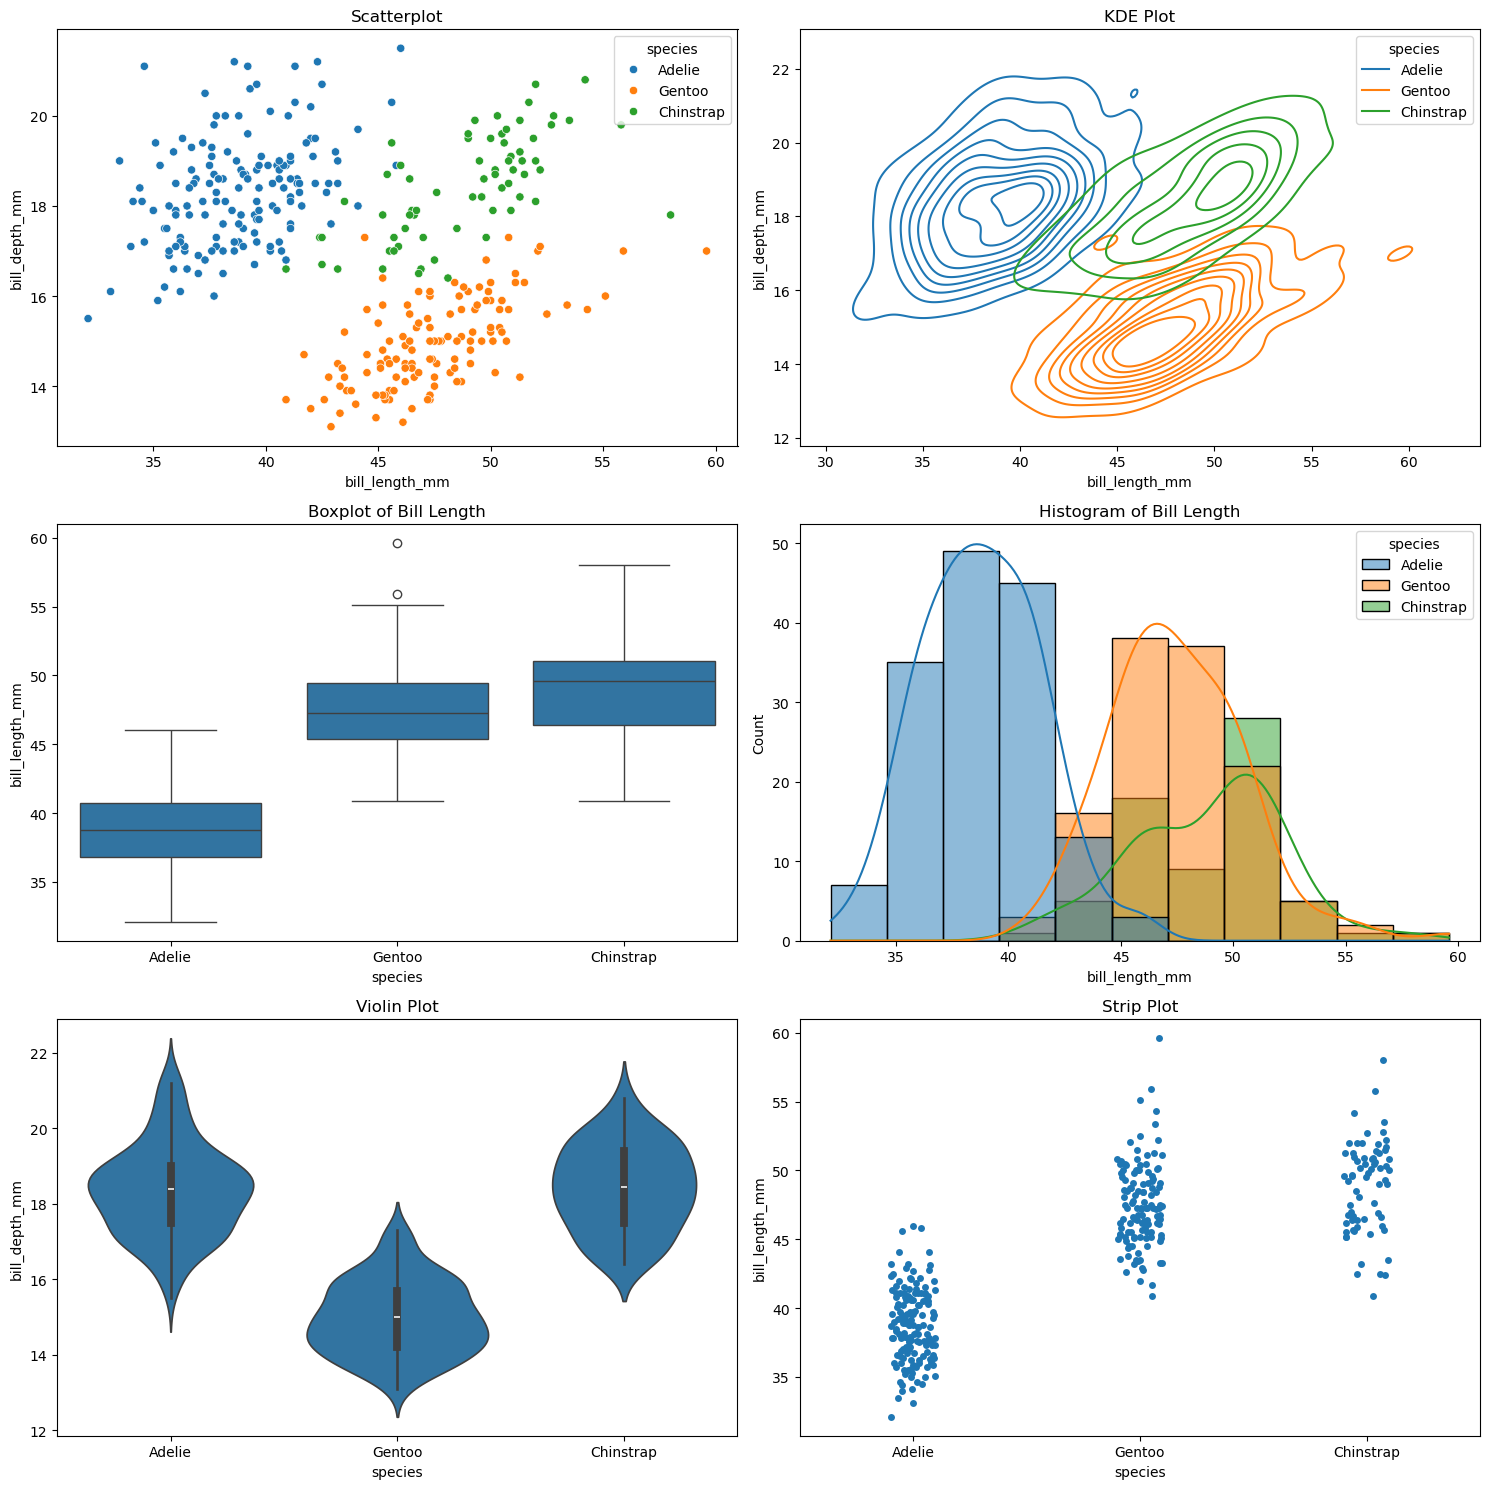

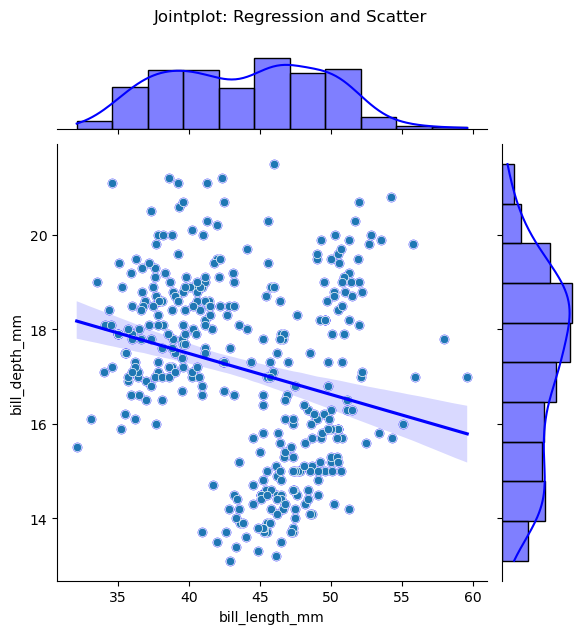

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(3, 2, figsize=(15, 15))  # Adjusted layout for 6 plots

sns.scatterplot(x='bill_length_mm', y='bill_depth_mm', hue='species', data=dataset, ax=axes[0, 0])
axes[0, 0].set_title("Scatterplot")

sns.kdeplot(x='bill_length_mm', y='bill_depth_mm', hue='species', data=dataset, ax=axes[0, 1])
axes[0, 1].set_title("KDE Plot")

sns.boxplot(x='species', y='bill_length_mm', data=dataset, ax=axes[1, 0])
axes[1, 0].set_title("Boxplot of Bill Length")

sns.histplot(x='bill_length_mm', hue='species', data=dataset, ax=axes[1, 1], kde=True)
axes[1, 1].set_title("Histogram of Bill Length")

sns.violinplot(x='species', y='bill_depth_mm', data=dataset, ax=axes[2, 0])
axes[2, 0].set_title("Violin Plot")

sns.stripplot(x='species', y='bill_length_mm', data=dataset, ax=axes[2, 1], jitter=True)
axes[2, 1].set_title("Strip Plot")

plt.tight_layout()

sns.jointplot(x='bill_length_mm', y='bill_depth_mm', data=dataset, kind='reg', color='blue').plot_joint(sns.scatterplot)
plt.suptitle("Jointplot: Regression and Scatter", y=1.05)

plt.show()

# Q7: Maximum flipper_length_mm for each species and island

In [19]:
max_flippers = dataset.groupby(['species', 'island'])['flipper_length_mm'].max().reset_index()
print("Maximum flipper_length_mm by species and island:\n", max_flippers)

Maximum flipper_length_mm by species and island:
      species     island  flipper_length_mm
0     Adelie     Biscoe              203.0
1     Adelie      Dream              208.0
2     Adelie  Torgersen              210.0
3  Chinstrap      Dream              212.0
4     Gentoo     Biscoe              231.0


# Q8: Perform Z-score normalization

In [21]:
from scipy.stats import zscore

normalized_data = dataset.copy()
for col in numeric_cols:
    normalized_data[col] = zscore(dataset[col])

print(normalized_data.head())

  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen       -0.886673       0.787248          -1.419709   
1  Adelie  Torgersen       -0.813220       0.127594          -1.063487   
2  Adelie  Torgersen       -0.666313       0.432050          -0.422288   
3  Adelie  Torgersen       -0.941763       0.635020          -0.778510   
4  Adelie  Torgersen       -1.327394       1.091704          -0.564777   

   body_mass_g      sex  
0    -0.470228     male  
1    -0.425407   female  
2    -0.918436   female  
3    -0.515049  Unknown  
4    -0.739153   female  
